# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**Feb 26, 11:59pm: See the [Calendar](https://github.com/UBC-CS/cpsc330-2023W2/tree/main?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W2/blob/main/docs/homework_instructions.md).

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

Looking at the dataset, we think that some of the columns needs to be normalized. ID should be dropped. Whether a person defaults should depend on his bill amount and potentially his credit and education level.

In [2]:
dataset = pd.read_csv("./data/UCI_Credit_Card.csv")
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [3]:
train_df, test_df = train_test_split(dataset, random_state=76, test_size=0.3)

X = dataset.drop(columns=["default.payment.next.month"])
y = dataset["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=76
)

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [4]:
missingValue = train_df.apply(lambda x: sum(x.isna()))
print(missingValue)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


There are no missing values in any of the variables, so we won't need to use imputation for data preprocessing later.

In [5]:
train_df.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15011.587619,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,...,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,8658.232639,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,...,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7493.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,15041.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22505.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


The range for each variable from BILL_AMT1 to BILL_AMT6 and PAY_AMT1 to PAY_AMT6 is quite large in which there is a significant difference between the minimum and maximum values, which indicates the need for scaling these variables.

In [6]:
train_df["PAY_0"].unique()

array([ 0, -1,  2,  1, -2,  3,  4,  5,  8,  6,  7], dtype=int64)

In [7]:
train_df["MARRIAGE"].unique()

array([2, 1, 3, 0], dtype=int64)

In [8]:
train_df["EDUCATION"].unique()

array([1, 2, 3, 5, 4, 6, 0], dtype=int64)

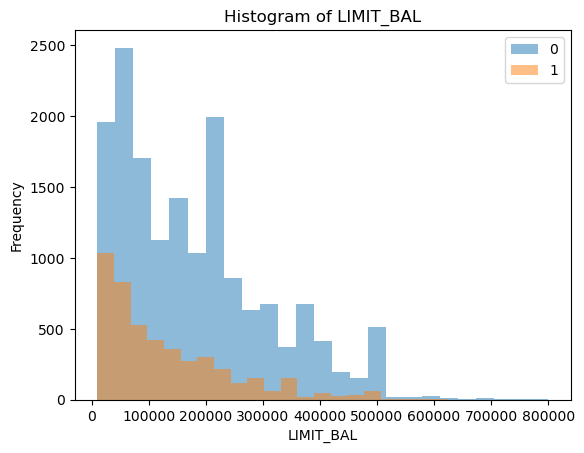

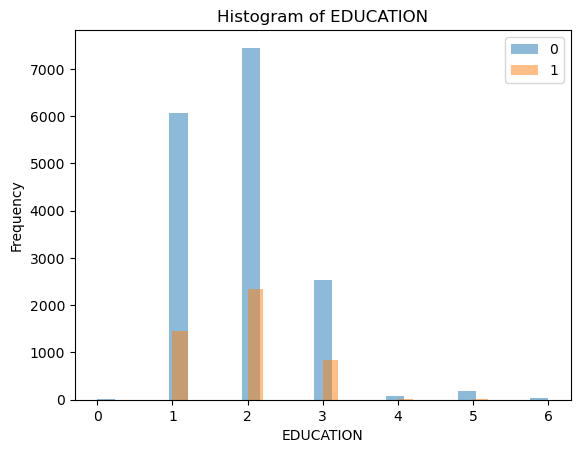

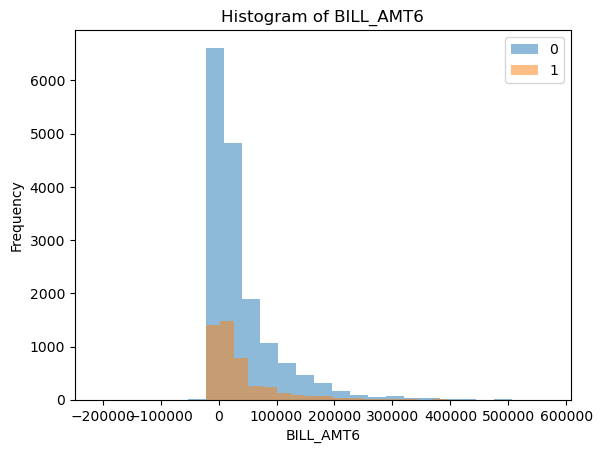

In [9]:
plot_cols = ["LIMIT_BAL", "EDUCATION", "BILL_AMT6"]

# Copied from HW2
def plot_feature_against_target(feat):
    ax = train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=25, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()
for feat in plot_cols:
    plot_feature_against_target(feat)

With higher credit and education, one is less likely to have to pay for default payment. Higher bill is likely to default. LIMIT_BAL and BILL_AMT need to be scaled.

In [10]:
dataset["default.payment.next.month"].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

A good metrics for this model would be to combine precision and recall which is F1 score. Since the dataset is inbalanced, it is good to use F1 score.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

| Feature | Transformation | Explanation |
|---------|----------------|-------------|
| ID | Drop | Useless column |
| LIMIT_BAL | Scaling | Values have a very big range |
| SEX | One-hot Encoding | Binary categorical column |
| EDUCATION | Ordinal Encoding | Order from 6 to 1. Should change all 0's to most frequently seen value |
| MARRIAGE | One-hot Encoding | Categorical column. 0 is unknown, just keep it |
| AGE | Scaling | Values have a big range |
| PAY_0 to PAY_6 | Ordinal Encoding | Order from 8 to -2 |
| BILL_AMT1 to BILL_AMT6 | Scaling | Values have a big range |
| PAY_AMT1 to PAY_AMT6 | Scaling | Values have a big range |
| default.payment.next.month | One-hot Encoding | Categorical column |

In [11]:
# Columns

categorical_cols_y = "default.payment.next.month"

drop_cols = ["ID"]

numeric_cols = ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", 
                "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

categorical_cols_X = ["SEX", "MARRIAGE"]

ordinal_cols_pay = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
pay_ordering = [[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]] * len(ordinal_cols_pay)

mode = dataset['EDUCATION'].mode()[0]
X_train['EDUCATION'] = X_train['EDUCATION'].replace(0, mode)
X_test['EDUCATION'] = X_test['EDUCATION'].replace(0, mode)
ordinal_cols_edu = ["EDUCATION"]
edu_ordering = [[1, 2, 3, 4, 5, 6]]

In [12]:
# Transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="if_binary", handle_unknown="ignore")
ordinal_transformer_pay = OrdinalEncoder(categories = pay_ordering)
ordinal_transformer_edu = OrdinalEncoder(categories = edu_ordering)

In [13]:
# Column Transformers Preprocessor
preprocessor_X = make_column_transformer(
    (numeric_transformer, numeric_cols),
    (categorical_transformer, categorical_cols_X),
    (ordinal_transformer_pay, ordinal_cols_pay),
    (ordinal_transformer_edu, ordinal_cols_edu),
    ("drop", drop_cols),
    remainder="passthrough"
)

In [14]:
# Preprocessing
transformed_X_train = preprocessor_X.fit_transform(X_train)
transformed_X_test = preprocessor_X.transform(X_test)
transformed_X_train

array([[ 1.32729199,  0.93990457,  0.43392148, ...,  2.        ,
         2.        ,  0.        ],
       [ 0.24967276, -0.15465623,  2.09451429, ...,  1.        ,
         1.        ,  1.        ],
       [-0.67400086, -1.03030486,  0.37707167, ...,  2.        ,
         2.        ,  1.        ],
       ...,
       [-0.67400086, -0.04520015, -0.64475849, ...,  1.        ,
         1.        ,  0.        ],
       [-0.67400086, -0.92084878, -0.66674078, ...,  1.        ,
         1.        ,  1.        ],
       [-0.52005526, -0.26411231,  0.32957689, ...,  2.        ,
         2.        ,  0.        ]])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [17]:
SCORING = "f1"

In [18]:
# Pipeline
pipe_dummy = make_pipeline(preprocessor_X, DummyClassifier(random_state=76))
pipe_dummy.fit(X_train, y_train)

scores = cross_validate(pipe_dummy, X_train, y_train, cv=10, scoring=SCORING, return_train_score=True)
print("Mean validation score %0.3f" % (np.mean(scores["test_score"])))
print("Mean training score %0.3f" % (np.mean(scores["train_score"])))
pd.DataFrame(scores)

Mean validation score 0.000
Mean training score 0.000


,fit_time,score_time,test_score,train_score
0,0.035622,0.009946,0.0,0.0
1,0.038923,0.012079,0.0,0.0
2,0.036865,0.008165,0.0,0.0
3,0.053705,0.007744,0.0,0.0
4,0.035787,0.010532,0.0,0.0
5,0.039436,0.006608,0.0,0.0
6,0.030996,0.010063,0.0,0.0
7,0.034886,0.010857,0.0,0.0
8,0.041251,0.008189,0.0,0.0
9,0.033939,0.007877,0.0,0.0


In [19]:
data = {
    "calculation": [],
    "accuracy": [],
    "error": [],
    "precision": [],
    "recall": [],
    "f1 score": [],
}
data["accuracy"].append(accuracy_score(y_test, pipe_dummy.predict(X_test)))
data["error"].append(1 - accuracy_score(y_test, pipe_dummy.predict(X_test)))
data["precision"].append(
    precision_score(y_test, pipe_dummy.predict(X_test), zero_division=1)
)
data["recall"].append(recall_score(y_test, pipe_dummy.predict(X_test)))
data["f1 score"].append(f1_score(y_test, pipe_dummy.predict(X_test)))
data["calculation"].append("sklearn")
df = pd.DataFrame(data)
df.set_index(["calculation"])

,accuracy,error,precision,recall,f1 score
calculation,,,,,
sklearn,0.780333,0.219667,1.0,0.0,0.0


`DummyClassifier` seems to be giving perfect precision while having 0 recall. This results in a 0 f1-score.
This is because `DummyClassifier` is predicting all negative results.

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [20]:
# Pipeline
pipe_lr = make_pipeline(preprocessor_X, LogisticRegression(random_state=76))
pipe_lr.fit(X_train, y_train)
logisticScores = cross_validate(pipe_lr, X_train, y_train, cv=10, scoring=SCORING, return_train_score=True)
print("Mean validation score %0.3f" % (np.mean(logisticScores["test_score"])))
print("Mean training score %0.3f" % (np.mean(logisticScores["train_score"])))
pd.DataFrame(logisticScores)

c:\Users\wsr20\anaconda3\envs\cpsc330\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\wsr20\anaconda3\envs\cpsc330\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Mean validation score 0.355
Mean training score 0.358


c:\Users\wsr20\anaconda3\envs\cpsc330\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,fit_time,score_time,test_score,train_score
0,0.126316,0.004548,0.310000,0.361881
1,0.112378,0.009968,0.365971,0.356695
2,0.116444,0.008511,0.379585,0.352708
3,0.113817,0.010312,0.384000,0.354458
4,0.109870,0.007006,0.326797,0.361527
5,0.114819,0.010209,0.393701,0.356120
6,0.109602,0.007558,0.392971,0.353026
7,0.117615,0.007684,0.332795,0.365385
8,0.104113,0.009014,0.352751,0.356400
9,0.129896,0.009586,0.309446,0.365936


In [22]:
#lecture 7
scores_dict = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": [],
    "mean_cv_scores": [],
    "std_cv_scores": [],
}

for C in scores_dict["C"]:
    pipe_lr_tuning = make_pipeline(preprocessor_X, LogisticRegression(C=C))
    scores = cross_validate(pipe_lr_tuning, X_train, y_train, scoring=SCORING, return_train_score=True, return_estimator=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())
    scores_dict["std_cv_scores"].append(scores["test_score"].std())

results_df = pd.DataFrame(scores_dict)
results_df

c:\Users\wsr20\anaconda3\envs\cpsc330\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\wsr20\anaconda3\envs\cpsc330\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

,C,mean_train_scores,mean_cv_scores,std_cv_scores
0,0.0001,0.043931,0.044300,0.015553
1,0.0010,0.267119,0.266376,0.030952
2,0.0100,0.344808,0.345605,0.022672
3,0.1000,0.357114,0.354991,0.020422
4,1.0000,0.358333,0.356851,0.019441
5,10.0000,0.358458,0.358177,0.019594
6,100.0000,0.358398,0.357907,0.019889
7,1000.0000,0.358435,0.358177,0.019594
8,10000.0000,0.358481,0.357907,0.019889
9,100000.0000,0.358479,0.358177,0.019594


The best score appears with $C = 10, 1000, 100000$ with $mean = 0.358177$, $std = 0.019594$

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [23]:
# model: SVM
from sklearn.svm import SVC

pipe_svm = make_pipeline(preprocessor_X, SVC(random_state=76))
svmScores = cross_validate(pipe_svm, X_train, y_train, scoring=SCORING, return_train_score=True)
print("Mean validation score %0.3f" % (np.mean(svmScores["test_score"])))
print("Mean training score %0.3f" % (np.mean(svmScores["train_score"])))
pd.DataFrame(svmScores)

Mean validation score 0.455
Mean training score 0.468


,fit_time,score_time,test_score,train_score
0,8.385656,2.758621,0.451051,0.465291
1,8.539899,3.162435,0.481534,0.463319
2,9.564452,3.340264,0.443969,0.472202
3,9.519089,3.199998,0.449390,0.468494
4,9.097055,3.077603,0.448519,0.471886


In [24]:
# model: Random Forest

pipe_rf = make_pipeline(preprocessor_X, RandomForestClassifier(random_state=76))
rfScores = cross_validate(pipe_rf, X_train, y_train, scoring=SCORING, return_train_score=True)
print("Mean validation score %0.3f" % (np.mean(rfScores["test_score"])))
print("Mean training score %0.3f" % (np.mean(rfScores["train_score"])))
pd.DataFrame(rfScores)

Mean validation score 0.479
Mean training score 0.999


,fit_time,score_time,test_score,train_score
0,10.012622,0.088094,0.470588,0.999597
1,9.200471,0.085725,0.490970,0.998927
2,9.589744,0.079447,0.478759,0.999195
3,9.105357,0.080298,0.466759,0.998793
4,9.683739,0.080029,0.487214,0.998927


In [25]:
# model: KNN
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = make_pipeline(preprocessor_X, KNeighborsClassifier())
knnScores = cross_validate(pipe_knn, X_train, y_train, scoring=SCORING, return_train_score=True)
print("Mean validation score %0.3f" % (np.mean(knnScores["test_score"])))
print("Mean training score %0.3f" % (np.mean(knnScores["train_score"])))
pd.DataFrame(knnScores)

Mean validation score 0.434
Mean training score 0.573


,fit_time,score_time,test_score,train_score
0,0.036321,1.034258,0.437831,0.565995
1,0.032621,0.122775,0.434505,0.573618
2,0.028896,0.106882,0.433530,0.579512
3,0.028589,0.109999,0.424603,0.575915
4,0.037284,0.126586,0.437746,0.569481


`SVM`: second-best cv test score with barely any overfitting.

`Random Forest`: severely overfitting, but is giving the best cv test score. Need to see its performance on test set.

`KNN`: worst cv test score with moderate overfitting.

All three models beat the linear model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

For the logistic regression model, the best C hyperparameter is 10, with a best score of 0.358

In [26]:
#logistic regression

param_grid = {"logisticregression__C": 10.0 ** np.arange(-4, 6, 1)}

lr_search_multi = GridSearchCV(
    pipe_lr,
    param_grid,
    scoring=SCORING,
    return_train_score=True,
    n_jobs=-1,
)
lr_search_multi.fit(X_train, y_train)

print("Best hyperparameter values: ", lr_search_multi.best_params_)
print("Best score: %0.3f" % (lr_search_multi.best_score_))

Best hyperparameter values:  {'logisticregression__C': 10.0}
Best score: 0.358


c:\Users\wsr20\anaconda3\envs\cpsc330\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#svm model

param_grid = {
    "svc__C": 10.0 ** np.arange(-2, 4, 1)
}

svm_search_multi = GridSearchCV(
    pipe_svm,
    param_grid,
    scoring=SCORING,
    return_train_score=True,
    n_jobs=-1,
)
svm_search_multi.fit(X_train, y_train)

print("Best hyperparameter values: ", svm_search_multi.best_params_)
print("Best score: %0.3f" % (svm_search_multi.best_score_))

Best hyperparameter values:  {'svc__C': 10.0}
Best score: 0.462


For SVM, the best C is 10, with a a best score of 0.462. We only perform hyperparameter tuning for C because SVM takes too long to fit.

In [30]:
#knn model

param_grid = {"kneighborsclassifier__n_neighbors": np.arange(1, 50, 5)}

knn_search_multi = GridSearchCV(
    pipe_knn,
    param_grid,
    scoring=SCORING,
    return_train_score=True,
    n_jobs=-1,
)
knn_search_multi.fit(X_train, y_train)

print("Best hyperparameter values: ", knn_search_multi.best_params_)
print("Best score: %0.3f" % (knn_search_multi.best_score_))

Best hyperparameter values:  {'kneighborsclassifier__n_neighbors': 41}
Best score: 0.453


For KNN, the best n_neighbors is 41, with a best score of 0.453

In [31]:
#Random Forest

param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20]
}

forest_search_multi = GridSearchCV(
    pipe_rf,
    param_grid,
    scoring=SCORING,
    return_train_score=True,
    n_jobs=-1,
)
forest_search_multi.fit(X_train, y_train)

print("Best hyperparameter values: ", forest_search_multi.best_params_)
print("Best score: %0.3f" % (forest_search_multi.best_score_))

Best hyperparameter values:  {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 300}
Best score: 0.485


For Random Forest, the best n_extimators is 300 and max_depth is None (default) with a score of 0.485. Random Forest is also slow in terms of training, so we only do tuning for a small range of hyperparameters

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

The best model is Random Forest.

In [39]:
best = make_pipeline(preprocessor_X, RandomForestClassifier(n_estimators=300))
best.fit(X_train, y_train)
pred = best.predict(X_test)

In [40]:
f1_score(y_test, pred)

0.4725658103393593

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using [PrairieLearn](https://ca.prairielearn.com/pl/course_instance/6697). Don't forget to rename your file `hw4_sol.ipynb`.

This was a tricky one but you did it!

![](img/eva-well-done.png)